## 2) Walmart Sales Forecasting Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/gagandeepsinghkhanuja/Walmart-Sales-Forecasting/master/features.csv"
url2 = "https://raw.githubusercontent.com/gagandeepsinghkhanuja/Walmart-Sales-Forecasting/master/train.csv"
url3 = "https://raw.githubusercontent.com/gagandeepsinghkhanuja/Walmart-Sales-Forecasting/master/stores.csv"
feat = pd.read_csv(url)
data = pd.read_csv(url2)
stores = pd.read_csv(url3)

In [3]:
feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Data manipulation

In [6]:
feat.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
from statistics import mean
feat['CPI'] = feat['CPI'].fillna(feat['CPI'].mean())
feat['Unemployment'] = feat['Unemployment'].fillna(feat['Unemployment'].mean())
feat['MarkDown1'] = feat['MarkDown1'].fillna(0)
feat['MarkDown2'] = feat['MarkDown2'].fillna(0)
feat['MarkDown3'] = feat['MarkDown3'].fillna(0)
feat['MarkDown4'] = feat['MarkDown4'].fillna(0)
feat['MarkDown5'] = feat['MarkDown5'].fillna(0)

In [8]:
feat.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [9]:
new_data = pd.merge(feat, data, on=['Store','Date','IsHoliday'], how='inner')
# merging(adding) all stores info with new training data
final_data = pd.merge(new_data,stores,how='inner',on=['Store'])

In [10]:
# sorting data with respect to date
final_data = final_data.sort_values(by='Date')

In [11]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681


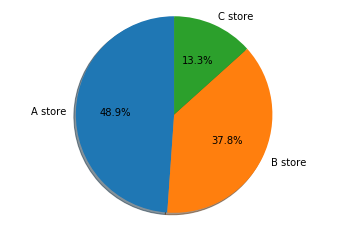

In [12]:
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

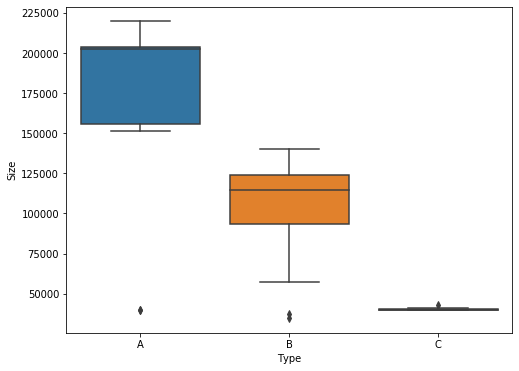

In [13]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

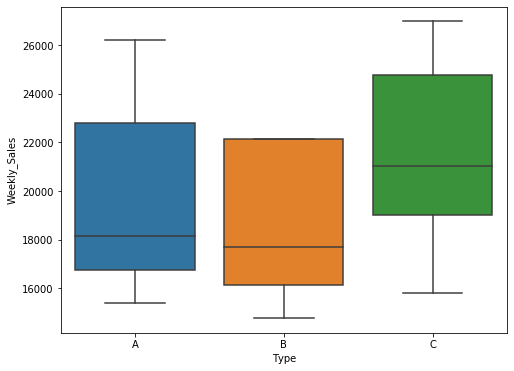

In [14]:
store_sale = pd.concat([stores['Type'], data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

[]

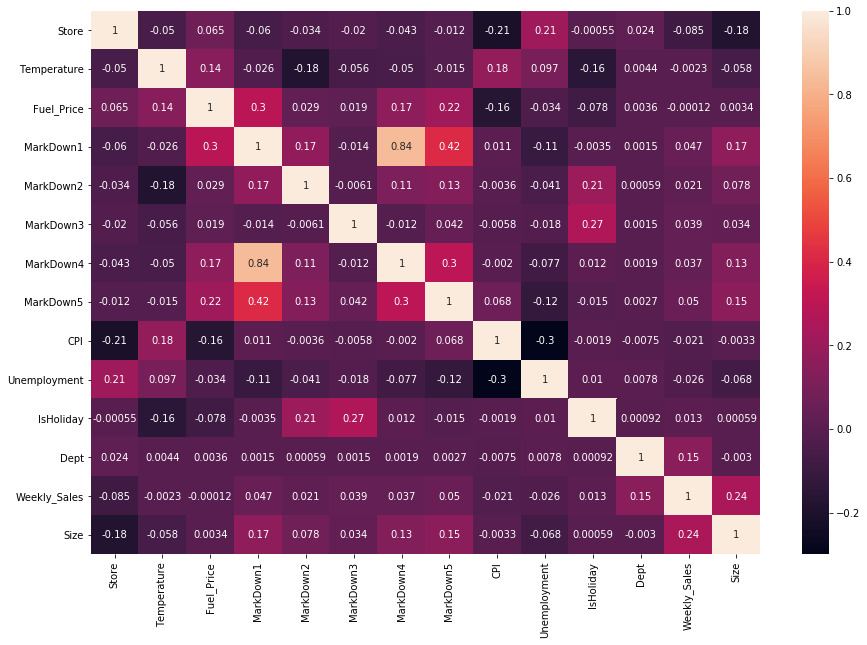

In [15]:
# Plotting correlation between all important features
corr = final_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [16]:
url4 = "https://raw.githubusercontent.com/gagandeepsinghkhanuja/Walmart-Sales-Forecasting/master/test.csv"
final_test_data = pd.read_csv(url4)

In [17]:
# Add column for year
final_data["Year"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.year
final_test_data["Year"] = pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d").dt.year
# Add column for day
final_data["Day"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.day
final_test_data["Day"] = pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d").dt.day
# Add column for days to next Christmas
final_data["Days to Next Christmas"] = (pd.to_datetime(final_data["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)
final_test_data["Days to Next Christmas"] = (pd.to_datetime(final_test_data["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [18]:
final_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day,Days to Next Christmas
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
330761,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19,B,103681,2010,5,329
330762,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15,B,103681,2010,5,329
330763,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63,B,103681,2010,5,329
330764,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81,B,103681,2010,5,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71,A,219622,2012,26,66
128052,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00,A,219622,2012,26,66
128053,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93,A,219622,2012,26,66
390991,41,2012-10-26,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78,A,196321,2012,26,66


In [19]:
tp = pd.get_dummies(final_data.Type)
final_data = pd.concat([final_data, tp], axis=1)
final_data = final_data.drop(columns='Type')

In [20]:
final_data .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   421570 non-null  int64  
 1   Date                    421570 non-null  object 
 2   Temperature             421570 non-null  float64
 3   Fuel_Price              421570 non-null  float64
 4   MarkDown1               421570 non-null  float64
 5   MarkDown2               421570 non-null  float64
 6   MarkDown3               421570 non-null  float64
 7   MarkDown4               421570 non-null  float64
 8   MarkDown5               421570 non-null  float64
 9   CPI                     421570 non-null  float64
 10  Unemployment            421570 non-null  float64
 11  IsHoliday               421570 non-null  bool   
 12  Dept                    421570 non-null  int64  
 13  Weekly_Sales            421570 non-null  float64
 14  Size                

In [21]:
X = final_data .drop(["Date","Weekly_Sales","IsHoliday"],axis=1)
y = final_data ['IsHoliday']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [26]:
print("Train_Score: ",dt.score(X_train,y_train))
print("Test_Score: ",dt.score(X_test,y_test))

Train_Score:  1.0
Test_Score:  1.0


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[78391,     0],
       [    0,  5923]], dtype=int64)